#### Analysing the first lot of simulation that were run on AWS (01/03/2021).

Note that these simulations were run with te pre-release version of the simulation code and so results may not be directly comparable with later simulations (although the differences will be minor).

In [95]:
DATA_DIR = '../simulation_io/single_runs_070321//'

In [96]:
import pickle
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

import os, sys
MODEL_DIR = os.path.realpath(os.path.dirname('../superscript_model'))
sys.path.append(os.path.normpath(MODEL_DIR))
from superscript_model import model

In [10]:
# net = nx.read_gpickle('../simulation_io/network_timestep_50.gpickle')
# nx.draw(net, pos=nx.circular_layout(net))

In [98]:
#net.nodes[2]['agent'][0].skills.hard_skills

In [99]:
with open(DATA_DIR + 'random_all_in/tracked_projects_wc_100_np_2_ts_100.pickle', 'rb') as ifile:
    random = pickle.load(ifile)
    
with open(DATA_DIR + 'basin_w_timeline_flex/tracked_projects_wc_100_np_2_ts_100.pickle', 'rb') as ifile:
    basin_w_flex = pickle.load(ifile)
    
with open(DATA_DIR + 'basin_wo_timeline_flex/tracked_projects_wc_100_np_2_ts_100.pickle', 'rb') as ifile:
    basin_wo_flex = pickle.load(ifile)    
    
# with open(DATA_DIR + 'random_wo_timeline_flex/tracked_projects_wc_100_np_2_ts_100.pickle', 'rb') as ifile:
#     random_wo_flex = pickle.load(ifile)    

In [100]:
random

,project_id,prob,risk,budget,null,success,maximum_offset,realised_offset,start_time,ovr_prob_cpt,skill_balance_prob_cpt,creativity_match_prob_cpt,risk_prob_cpt,chemistry_prob_cpt,team_budget,team_ovr,team_creativity_match,team_size
0,3,0.000000,5,12.00,True,False,0,0,1,0.000000,0.000000,10.000000,3.75,0.00,NaN,NaN,NaN,NaN
1,6,0.000000,25,19.00,True,False,0,0,3,0.000000,0.000000,10.000000,3.75,0.00,NaN,NaN,NaN,NaN
2,8,0.000000,10,11.00,True,False,0,0,4,0.000000,0.000000,10.000000,3.75,0.00,NaN,NaN,NaN,NaN
3,9,0.000000,5,13.00,True,False,1,1,5,0.000000,0.000000,10.000000,3.75,0.00,NaN,NaN,NaN,NaN
4,0,0.000000,25,100.00,False,False,2,2,2,31.130665,-20.168277,-29.999907,-15.00,5.00,66.412085,41.507553,12.968760,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,187,0.000000,5,61.00,False,False,0,0,93,32.059884,-7.944827,-29.997355,0.00,3.75,38.471860,42.746511,9.623820,6.0
188,184,0.038645,25,88.75,False,False,1,1,93,38.392732,-10.158664,-14.369601,-15.00,5.00,43.511763,51.190310,0.939662,6.0
189,188,0.192220,10,37.00,False,False,0,0,94,51.236924,-3.267660,-29.997288,-3.75,5.00,27.326360,68.315899,9.598915,7.0
190,185,0.000000,10,67.00,False,False,2,2,94,25.121364,-17.007413,-17.306157,-3.75,5.00,33.495152,33.495152,1.147762,4.0


(array([102.,   0.,  52.,   0.,   0.,  24.,   0.,   9.,   0.,   5.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

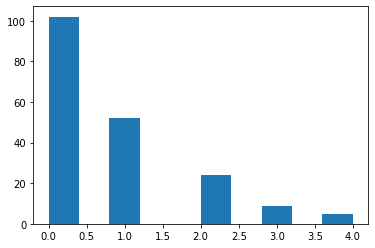

In [101]:
plt.hist(random.realised_offset);

In [102]:
assert all(random.realised_offset == random.maximum_offset)

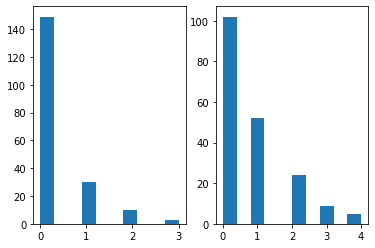

In [103]:
plt.subplot(1,2,1)
plt.hist(basin_w_flex.realised_offset)
plt.subplot(1,2,2)
plt.hist(basin_w_flex.maximum_offset);

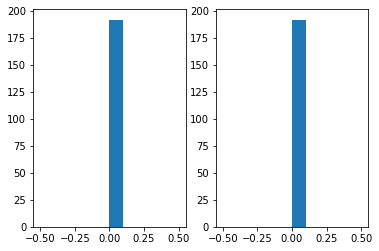

In [104]:
plt.subplot(1,2,1)
plt.hist(basin_wo_flex.realised_offset)
plt.subplot(1,2,2)
plt.hist(basin_wo_flex.maximum_offset);

In [105]:
print("Fraction of null projects.")
print("Random: ", np.round(sum(random.null) / len(random), 2))
print("Basin with timeline flex: ", np.round(sum(basin_w_flex.null) / len(basin_w_flex), 2))
print("Basin without timeline flex: ", np.round(sum(basin_wo_flex.null) / len(basin_wo_flex), 2))

Fraction of null projects.
Random:  0.16
Basin with timeline flex:  0.01
Basin without timeline flex:  0.01


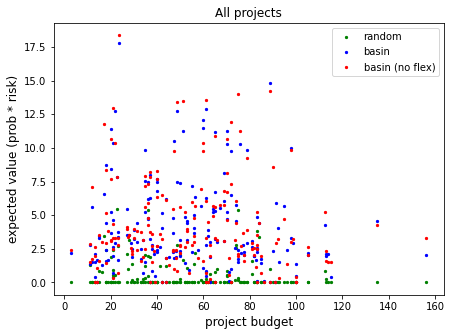

In [106]:
fs = 12
ps = 5
plt.figure(figsize=(7,5))
plt.scatter(random.budget,
            random.prob * random.risk,
            label='random', color='green', s=ps)

plt.scatter(basin_w_flex.budget,
            basin_w_flex.prob * basin_w_flex.risk,
            label='basin', color='blue', s=ps)

plt.scatter(basin_wo_flex.budget,
            basin_wo_flex.prob * basin_wo_flex.risk,
            label='basin (no flex)', color='red', s=ps)

plt.xlabel("project budget", fontsize=fs)
plt.ylabel("expected value (prob * risk)", fontsize=fs)
plt.title("All projects")
plt.legend();

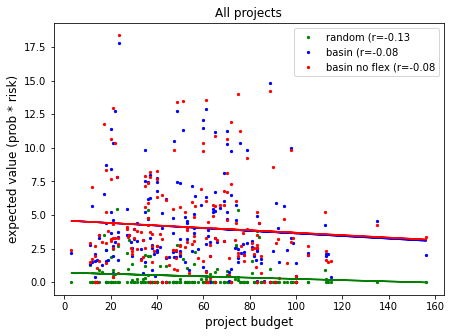

In [109]:
from scipy.stats import linregress

fs = 12
ps = 5


plt.figure(figsize=(7,5))
x = random.budget
y = random.prob * random.risk
slope, intercept, r_value, p_value, std_err = linregress(x, y)
plt.scatter(x,
            y,
            label='random (r=%.2f' % r_value, color='green', s=ps)
plt.plot(x, x*slope + intercept, color='green')

x = basin_w_flex.budget
y = basin_w_flex.prob * basin_w_flex.risk
slope, intercept, r_value, p_value, std_err = linregress(x, y)
plt.scatter(x,
            y,
            label='basin (r=%.2f' % r_value, color='blue', s=ps)
plt.plot(x, x*slope + intercept, color='blue')

x = basin_wo_flex.budget
y = basin_wo_flex.prob * basin_wo_flex.risk
slope, intercept, r_value, p_value, std_err = linregress(x, y)
plt.scatter(x,
            y,
            label='basin no flex (r=%.2f)' % r_value, color='red', s=ps)
plt.plot(x, x*slope + intercept, color='red')


plt.xlabel("project budget", fontsize=fs)
plt.ylabel("expected value (prob * risk)", fontsize=fs)
plt.title("All projects")
plt.legend();

In [141]:
random = random.loc[~random.null]
basin_w_flex = basin_w_flex.loc[~basin_w_flex.null]
basin_wo_flex = basin_wo_flex.loc[~basin_wo_flex.null]

In [142]:
# fs = 15
# ps = 5
# plt.scatter(random.budget,
#             random.prob * random.risk,
#             label='random', color='green', s=ps)

# plt.scatter(basin_w_flex.budget,
#             basin_w_flex.prob * basin_w_flex.risk,
#             label='basin', color='blue', s=ps)

# plt.scatter(basin_wo_flex.budget,
#             basin_wo_flex.prob * basin_wo_flex.risk,
#             label='basin (no flex)', color='red', s=ps)

# plt.xlabel("project budget", fontsize=fs)
# plt.ylabel("expected value (prob * risk)", fontsize=fs)
# plt.title("Non-null projects only")
# plt.legend();

In [143]:
print("Mean probability of success.")
print("Random: ", np.round(np.mean(random.prob), 2))
print("Basin with timeline flex: ", np.round(np.mean(basin_w_flex.prob), 2))
print("Basin without timeline flex: ", np.round(np.mean(basin_wo_flex.prob), 2))

Mean probability of success.
Random:  0.06
Basin with timeline flex:  0.36
Basin without timeline flex:  0.37


In [144]:
print("Fraction of successful projects.")
print("Random: ", np.round(sum(random.success) / len(random), 2))
print("Basin with timeline flex: ", np.round(sum(basin_w_flex.success) / len(basin_w_flex), 2))
print("Basin without timeline flex: ", np.round(sum(basin_wo_flex.success) / len(basin_wo_flex), 2))

Fraction of successful projects.
Random:  0.06
Basin with timeline flex:  0.33
Basin without timeline flex:  0.35


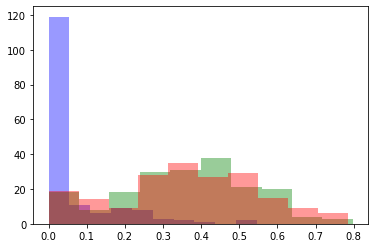

In [145]:
plt.hist(random.prob, alpha=0.4, color='blue')
plt.hist(basin_w_flex.prob, alpha=0.4, color='green')
plt.hist(basin_wo_flex.prob, alpha=0.4, color='red');

#### Project-wise comparison:

In [167]:
fraction_better = 0
for p in basin_w_flex.project_id:
    if p in list(basin_wo_flex.project_id):
        if float(basin_w_flex.loc[basin_w_flex.project_id==p].prob) >= float(basin_wo_flex.loc[basin_wo_flex.project_id==p].prob):
            fraction_better += 1
        
fraction_better /= len(basin_w_flex)
print(fraction_better)

0.5235602094240838


### Testing the hypotheses:

#### a) High risk projects (high stake) attract talent (high OVR)

Note: we should look at individual worker OVRs...

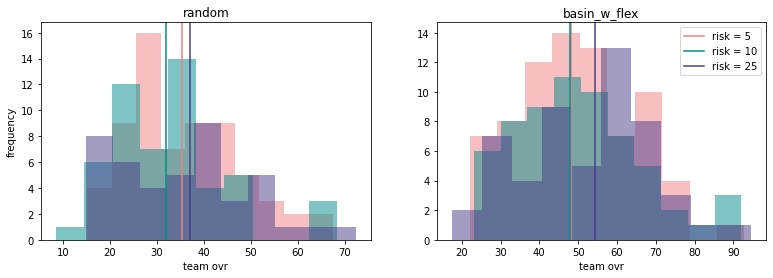

In [292]:
av = np.median
alph = 0.5

c1 = 'lightcoral'
c2 = 'darkcyan'
c3 = 'darkslateblue'

plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
plt.hist(random.loc[random.risk==5].team_ovr, alpha=alph, color=c1)
plt.hist(random.loc[random.risk==10].team_ovr, alpha=alph, color=c2)
plt.hist(random.loc[random.risk==25].team_ovr, alpha=alph, color=c3)
plt.axvline(av(random.loc[random.risk==5].team_ovr), color=c1, label='risk = 5')
plt.axvline(av(random.loc[random.risk==10].team_ovr), color=c2, label='risk = 10')
plt.axvline(av(random.loc[random.risk==25].team_ovr), color=c3, label='risk = 25')
plt.xlabel('team ovr')
plt.ylabel('frequency')
plt.title('random')


plt.subplot(1,2,2)
plt.hist(basin_w_flex.loc[basin_w_flex.risk==5].team_ovr, alpha=alph, color=c1)
plt.hist(basin_w_flex.loc[basin_w_flex.risk==10].team_ovr, alpha=alph, color=c2)
plt.hist(basin_w_flex.loc[basin_w_flex.risk==25].team_ovr, alpha=alph, color=c3)
plt.axvline(av(basin_w_flex.loc[basin_w_flex.risk==5].team_ovr), color=c1, label='risk = 5')
plt.axvline(av(basin_w_flex.loc[basin_w_flex.risk==10].team_ovr), color=c2, label='risk = 10')
plt.axvline(av(basin_w_flex.loc[basin_w_flex.risk==25].team_ovr), color=c3, label='risk = 25')
plt.legend()
plt.xlabel('team ovr')
plt.title('basin_w_flex');

#### b) Cognitively diverse teams have higher success rate than randomly selected teams

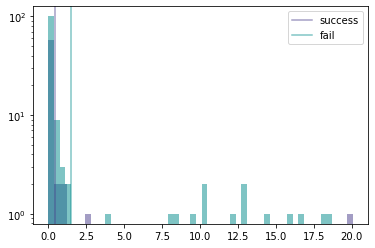

In [214]:
alpha=0.5
av = np.mean

plt.hist(basin_w_flex.loc[basin_w_flex.success==True].team_creativity_match, color=c3, alpha=alph, bins=50)
plt.axvline(av(basin_w_flex.loc[basin_w_flex.success==True].team_creativity_match), color=c3, alpha=alph, label='success')

plt.hist(basin_w_flex.loc[basin_w_flex.success==False].team_creativity_match, color=c2, alpha=alph, bins=50)
plt.axvline(av(basin_w_flex.loc[basin_w_flex.success==False].team_creativity_match), color=c2, alpha=alph, label='fail')

plt.legend()

plt.yscale('log');

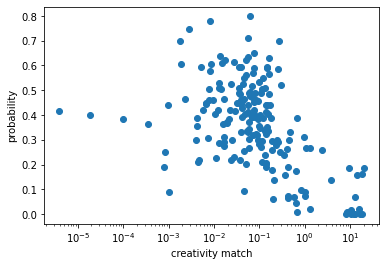

In [293]:
plt.scatter(basin_w_flex.team_creativity_match, basin_w_flex.prob)
plt.xscale('log')
plt.xlabel('creativity match')
plt.ylabel('probability');

#### c) Superstars emerge, i.e., workers who get over-proportionally selected to work in high stake projects, and, on the other hand, workers with low OVR are stuck with departmental workload and, over time, get replaced by new workers

In [229]:
with open(DATA_DIR + 'basin_w_timeline_flex/tracked_agents_wc_100_np_2_ts_100.pickle', 'rb') as ifile:
    agent_vars = pickle.load(ifile)

In [245]:
workers = set(agent_vars.index.get_level_values('AgentID'))

In [252]:
worker_frame

,,now,contributes,ovr,hard_skills,training,skill_decay,peer_assessment
Step,AgentID,,,,,,,
1,0,1,"{2: {'A': [5], 'B': [5], 'C': [], 'D': [5], 'E...",49.145450,"{'A': 4.95, 'B': 4.95, 'C': 0.0, 'D': 0.962727...","{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}","{'A': -0.04999999999999982, 'B': -0.0499999999...","{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}"
2,0,2,"{2: {'A': [5], 'B': [5], 'C': [], 'D': [5], 'E...",48.653996,"{'A': 4.95, 'B': 4.95, 'C': 0.0, 'D': 0.962727...","{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}","{'A': -0.04999999999999982, 'B': -0.0499999999...","{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}"
3,0,3,"{2: {'A': [5], 'B': [5], 'C': [], 'D': [5], 'E...",48.653996,"{'A': 4.95, 'B': 4.95, 'C': 0.0, 'D': 0.962727...","{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}","{'A': -0.04999999999999982, 'B': -0.0499999999...","{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}"
4,0,4,"{2: {'A': [5], 'B': [5], 'C': [], 'D': [5], 'E...",48.653996,"{'A': 4.95, 'B': 4.95, 'C': 0.0, 'D': 0.962727...","{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}","{'A': -0.04999999999999982, 'B': -0.0499999999...","{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}"
5,0,5,"{2: {'A': [5], 'B': [5], 'C': [], 'D': [5], 'E...",48.653996,"{'A': 4.95, 'B': 4.95, 'C': 0.0, 'D': 0.962727...","{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}","{'A': -0.04999999999999982, 'B': -0.0499999999...","{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}"
...,...,...,...,...,...,...,...,...
96,0,96,"{2: {'A': [5], 'B': [5], 'C': [], 'D': [5], 'E...",72.276383,"{'A': 4.95, 'B': 4.95, 'C': 0.0, 'D': 0.962727...","{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}","{'A': -0.04999999999999982, 'B': -0.0499999999...","{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}"
97,0,97,"{2: {'A': [5], 'B': [5], 'C': [], 'D': [5], 'E...",74.494949,"{'A': 4.95, 'B': 4.95, 'C': 0.0, 'D': 0.962727...","{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}","{'A': -0.04999999999999982, 'B': -0.0499999999...","{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}"
98,0,98,"{2: {'A': [5], 'B': [5], 'C': [], 'D': [5], 'E...",74.494949,"{'A': 4.95, 'B': 4.95, 'C': 0.0, 'D': 0.962727...","{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}","{'A': -0.04999999999999982, 'B': -0.0499999999...","{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}"


Note: that each 'contributes' entry as actually storing the whole list of worker contributions throughout the simulation. Can change this.

Note: 'contributes' runs beyond the end of the simulation because of timeline flexibility.

In [264]:
all_projects

In [268]:
flatten([contributes[2][skill] for skill in ['A', 'B', 'C', 'D', 'E']])

[5, 5, 5]

In [283]:
#for worker in workers:
#    agent_vars.iloc[agent_vars.index.get_level_values('AgentID') == worker]

worker_frame = agent_vars.iloc[agent_vars.index.get_level_values('AgentID') == 0]
contributes = worker_frame.iloc[0].contributes

flatten = lambda t: [item for sublist in t for item in sublist]

def get_all_projects_at_t(t, contributes):
    return set(flatten([contributes[t][skill] for skill in ['A', 'B', 'C', 'D', 'E']]))

x = []
y = []
z = [] 
    
for t in contributes.keys():
    if t <= 100:
        worker_ovr = worker_frame.loc[t].ovr
        all_projects = get_all_projects_at_t(t, contributes) 
        if all_projects is not None and len(all_projects) > 0:
            for p in all_projects:
                if p in basin_w_flex.project_id:
                    x.append(float(worker_ovr.iloc[0]))
                    y.append(float(basin_w_flex.loc[basin_w_flex.project_id==p].risk.iloc[0]))
                    z.append(float(basin_w_flex.loc[basin_w_flex.project_id==p].prob.iloc[0]))

48.653995907039004


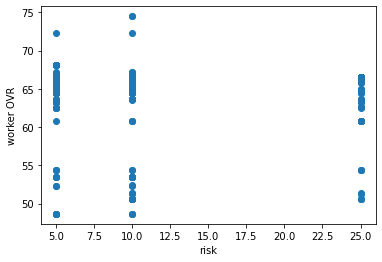

In [289]:
plt.scatter(y, x)
plt.xlabel('risk')
plt.ylabel('worker OVR');

print(min(x))

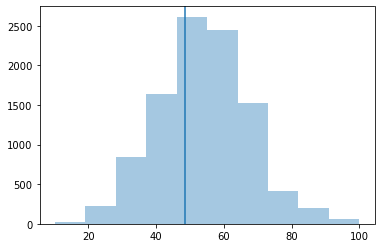

In [291]:
plt.hist(agent_vars.ovr, alpha=0.4)
plt.axvline(48.65);

#### d) Timeline flexibility pays off (start date can be later) in terms of higher project success rates

See above..more work to do here.

#### e) Budgetary flexibility pays off (higher budget) in terms of higher project success rates

Need to run more simulations...

#### f) Targeted training pays off in terms of higher project success rate and lower turnover

Need to run more simultations...

In [219]:
with open(DATA_DIR + 'basin_w_timeline_flex/tracked_model_vars_wc_100_np_2_ts_100.pickle', 'rb') as ifile:
    model_vars = pickle.load(ifile)

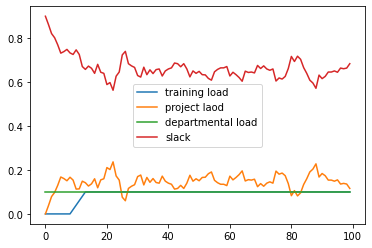

In [226]:
plt.plot(model_vars.index, model_vars.TrainingLoad, label='training load')
plt.plot(model_vars.index, model_vars.ProjectLoad, label='project load')
plt.plot(model_vars.index, model_vars.DeptLoad, label='departmental load')
plt.plot(model_vars.index, model_vars.Slack, label='slack')
plt.legend()

#### g) Some slack in the system, i.e., a utilization rate of workers <100% will add value


#### h) Too much slack in the system will increase turn-over (i.e., too many workers are not engaged in projects or trainings, the median skill level drops and workers get replaced)

#### i) Low OVR workers stay low OVR and eventually get replaced, et vice versa (“the rich get richer” effect)

#### j) More and earlier training mitigates “the rich get richer” effect 

Run simulations with different training parameters...

#### k) For high OVR workers, a high portion of their OVR change is due to project work experience while for low OVR workers a high portion of the OVR change is due to training

#### l) TThe higher the budgetary flexibility (up and down) and the lower the timing flexibility, the lower the latency (number of time steps a projects waits in the queue)